# A slightly revised version to explain the "shift the axis" remark

We will learn soon other ways to deal with the "badly conditioned matrix" issue, but in the meantime, to explain: as data scientists, plot quality is important. In short, you want your work to end up [here](https://www.reddit.com/r/dataisbeautiful/), not [here](https://www.reddit.com/r/dataisugly/).

There are many ways to deal with the issue. Here's a simple one.
1. Perform the data shift early on, after your first plot.
2. Fit both curves.
3. Plot the results and the data but **do not** label the x-axis.
4. Label the x-axis: the tick marks will be at the shifted values (from 0 to ..), but the labels will be shifted back.

To make this even easier, we'll just add the shifted time to the data, so we have both handy. Note that I do this later on, leaving the rest of this sheet as it was before.

In [53]:
data = read.csv("Canada_census.csv")
data

year,population
<int>,<int>
1851,2436297
1861,3229633
1871,3689257
1881,4324810
1891,4833239
1901,5371315
1911,7206643
1921,8787949
1931,10376786


In [3]:
x=data$year
y=data$population

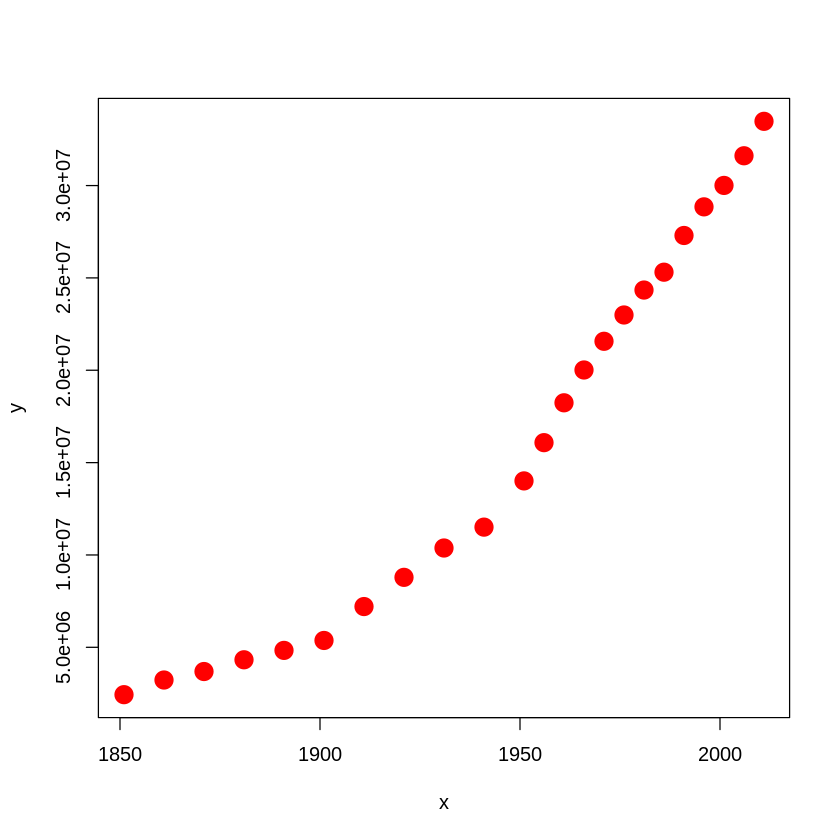

In [11]:
plot(x,y, pch = 19, cex = 2, col = "red")

In [15]:
A = matrix(c(rep(1, length(x)), x), nr = length(x), nc = 2)
A

1,1851
1,1861
1,1871
1,1881
1,1891
1,1901
1,1911
1,1921
1,1931
1,1941
1,1951


In [16]:
b = y
b

[1]  2436297  3229633  3689257  4324810  4833239  5371315  7206643  8787949
 [9] 10376786 11506655 14009429 16080791 18238247 20014880 21568311 22992604
[17] 24343000 25309000 27297000 28847000 30007000 31613000 33477000

In [17]:
ATA = t(A) %*% A
ATA

23,44713
44713,86977653


In [24]:
det(ATA)

[1] 1233650

In [25]:
invATA = solve(ATA)
invATA

70.50431889,-3.624448e-02
-0.03624448,1.864386e-05


In [28]:
sol = invATA %*% t(A) %*% b
sol

-377660589.2
202664.8


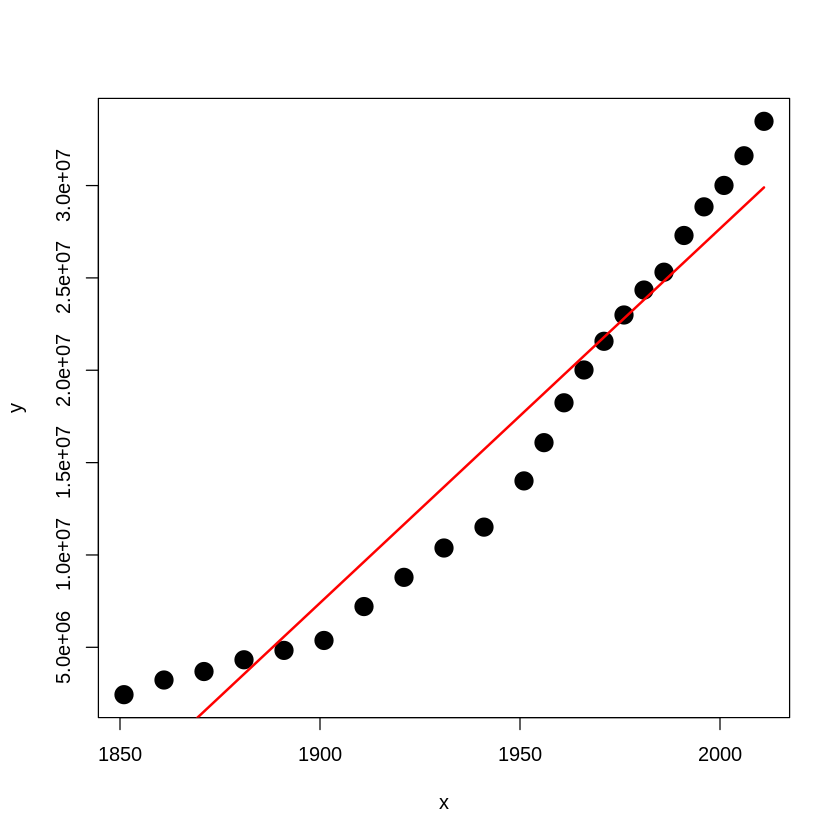

In [29]:
plot(x,y, pch = 19, cex = 2)
lines(x, sol[1]+sol[2]*x, type = "l", lwd = 2, col = "red")

In [30]:
A = matrix(c(rep(1, length(x)), x, x^2), nr = length(x), nc = 3)
A

1,1851,3426201
1,1861,3463321
1,1871,3500641
1,1881,3538161
1,1891,3575881
1,1901,3613801
1,1911,3651921
1,1921,3690241
1,1931,3728761
1,1941,3767481
1,1951,3806401


In [32]:
ATA = t(A) %*% A
ATA

23,44713,8.697765e+07
44713,86977653,1.692957e+11
86977653,169295746843,3.297200e+14


In [33]:
det(ATA)

[1] 1.169443e+14

In [34]:
invATA = solve(ATA)
invATA

ERROR: Error in solve.default(ATA): system is computationally singular: reciprocal condition number = 2.05592e-20


# Edit

That's when we do the shift, so let us "revamp" the data a little to make it more friendly. We will not use it, but it is a good habit to have because in a more complex project, we would use this rather than x and x_new.

In [54]:
x_new = x-min(x)
# We also add this to the data
data$year_shifted = x_new
# If you wanted to make the data set even prettier, you could do something like the following (commented) line
# data = data[,c("year", "year_shifted", "population")]
# or, using just the column indices (but if you have names, use them, it's more flexible)
# data = data[,c(1,3,2)]
data = data[which(data$year<=1980),]
data

,year,population,year_shifted
,<int>,<int>,<int>
1,1851,2436297,0
2,1861,3229633,10
3,1871,3689257,20
4,1881,4324810,30
5,1891,4833239,40
6,1901,5371315,50
7,1911,7206643,60
8,1921,8787949,70
9,1931,10376786,80


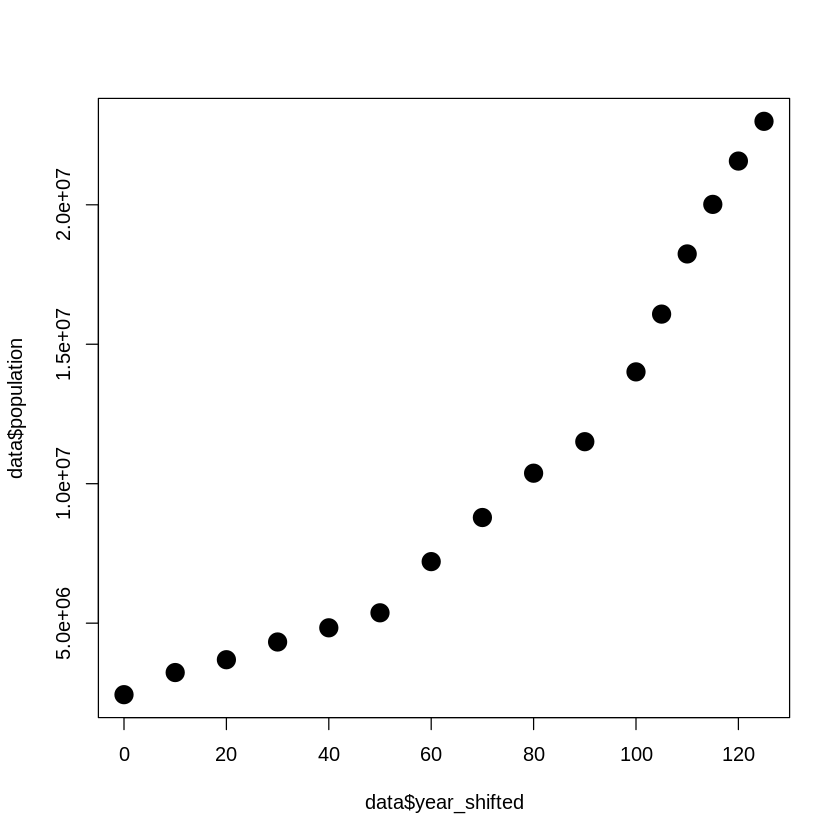

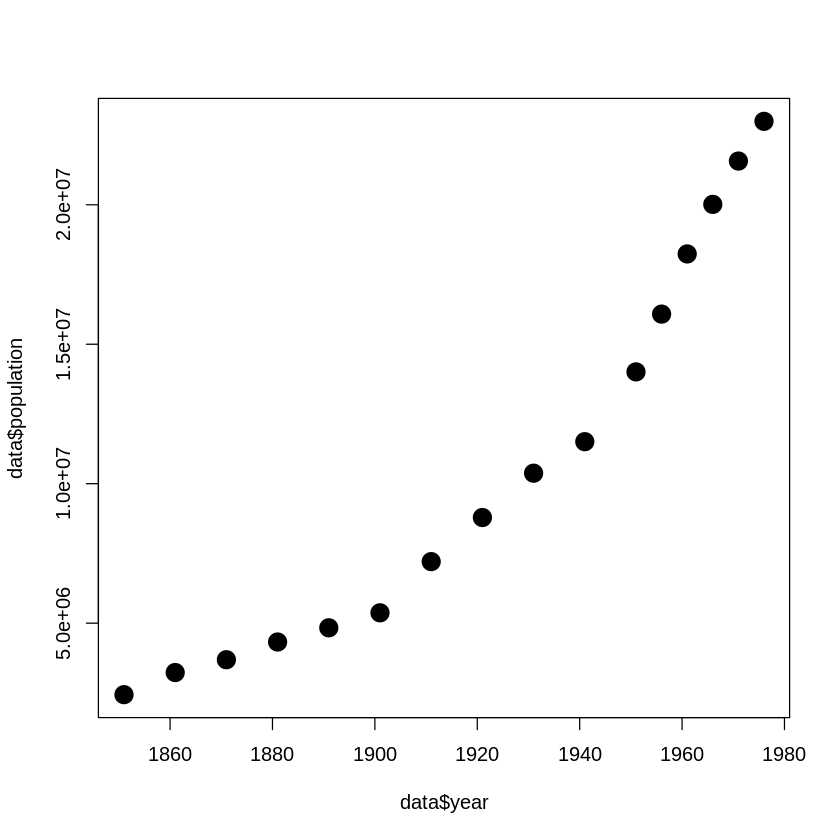

In [55]:
plot(data$year_shifted,data$population, pch=19, cex=2)
plot(data$year,data$population, pch=19, cex=2)

The following cells change from before. I first rerun the first fit, run the second fit, then plot everything. I use the suffixes _l for the line and _q for the quadratic.

In [56]:
A_l = matrix(c(rep(1, length(x_new)), x_new), nr = length(x_new), nc = 2)
ATA_l = t(A_l) %*% A_l
det(ATA_l)
invATA_l = solve(ATA_l)
sol_l = invATA_l %*% t(A_l) %*% b

A_q = matrix(c(rep(1, length(x)), x_new, x_new^2), nr = length(x), nc = 3)
ATA_q = t(A_q) %*% A_q
det(ATA_q)
invATA_q = solve(ATA_q)
sol_q = invATA_q %*% t(A_q) %*% b
sol_q

[1] 1233650

[1] 1.169443e+14

2730500.544
3442.989
1208.270


In [58]:
z=2020-min(x)
sol_q[1]+sol_q[2]*z+sol_q[3]*z^2

[1] 37821776

We plot everything in terms of x_new, but we do not label the x-axis (`xaxt="n"`), then use the function `axis` to do that "by hand". For that function, 1 means x-axis below, 2 is y-axis left, 3 is x-axis top and 4 is y-axis right, `at` is .. where the labels are, `labels` is .. you guessed it, the labels.

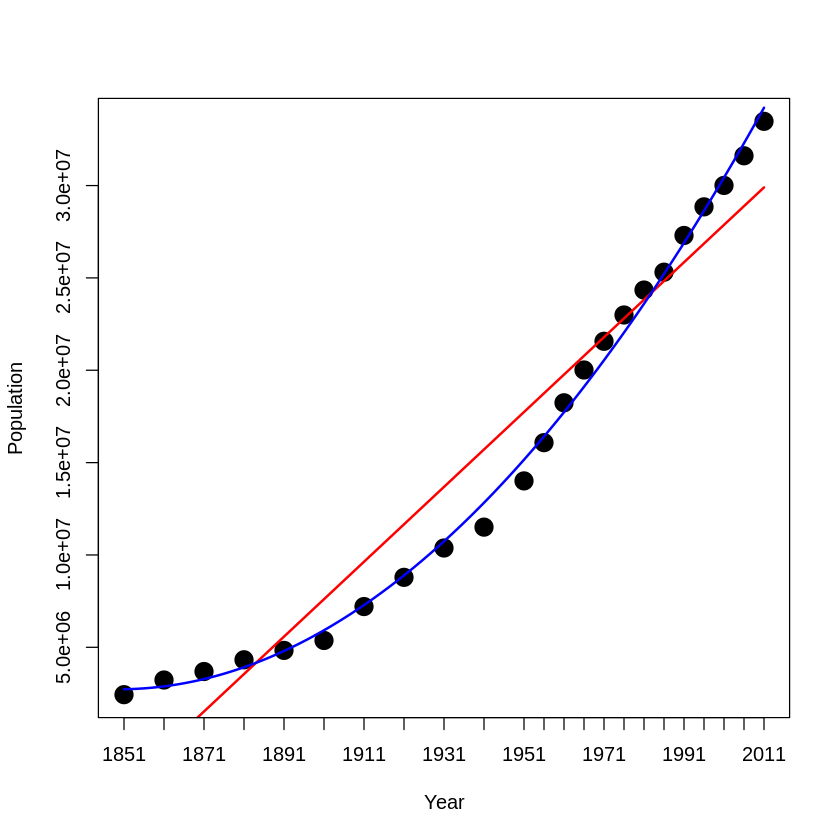

In [46]:
x_values = seq(x_new[1], x_new[length(x_new)], 0.01)

plot(x_new, y, pch = 19, cex = 2, xaxt = "n", 
    xlab = "Year", ylab = "Population")
lines(x_values, sol_l[1]+sol_l[2]*x_values, 
      type = "l", lwd = 2, col = "red")
lines(x_values, sol_q[1]+sol_q[2]*x_values+sol_q[3]*x_values^2, 
      type = "l", lwd = 2, col = "blue")
axis(1, at = x_new, labels = x)

Yipee!!! One last piece of advice: you can look at `pretty(x)`, which will help get the labels and tickmarks in more sensible positions. One remark, though: if you use `pretty` on `x` and `x_new`, it is not certain that the breaks will be the same. Let us check.. 

In [44]:
pretty(x)
pretty(x_new)

[1] 1850 1900 1950 2000 2050

[1]   0  50 100 150 200

OK, it looks as though it chose corresponding breakpoints. Otherwise, you would just `pretty(x_new)+1851` for the labels.

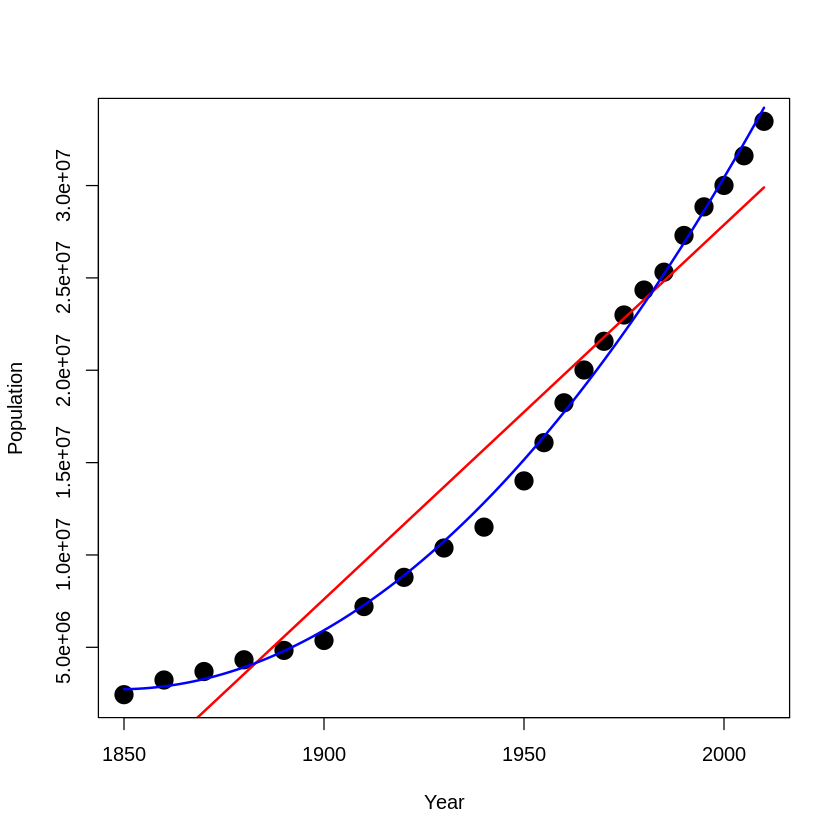

In [45]:
plot(x_new, y, pch = 19, cex = 2, xaxt = "n", 
    xlab = "Year", ylab = "Population")
lines(x_values, sol_l[1]+sol_l[2]*x_values, 
      type = "l", lwd = 2, col = "red")
lines(x_values, sol_q[1]+sol_q[2]*x_values+sol_q[3]*x_values^2, 
      type = "l", lwd = 2, col = "blue")
axis(1, at = pretty(x_new),labels = pretty(x))